**Developer : Mohammad Mahdi Omidvar**


NLP with Deep Learning

Sentiment Analysis with RNN (LSTM)

IMDB Dataset

In [47]:
#install Python3.8.8
#install TensorFlow 
#install Keras 
#install Numpy 
#install Matplotlib 
#install WordCloud

In [ ]:
!pip install tensorflow  keras numpy  matplotlib wordcloud

**importing libraries**

In [48]:
import numpy as np
from keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense,SimpleRNN,Embedding
from keras.models import Sequential
import keras
from wordcloud import WordCloud
import matplotlib.pyplot as plt

**downloading the dataset**

In [37]:
numwords=10000

(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=numwords,maxlen=250)

**loading the word index**

In [38]:
word_index=imdb.get_word_index()

In [39]:
for (word,adad) in word_index.items():
    if adad==14:
        print(word)
        break

as


**number to word**

In [40]:
def number_to_word(comment):
    jomle=''
    for x in comment:
        for (word,adad) in word_index.items():
            if adad==x:
                jomle=jomle+' '+ word
                break
    print(jomle)

In [35]:
comment=X_train[3]

In [ ]:
print(len(comment))

147


In [41]:
number_to_word(comment)

 the sure themes br only acting i i was favourite as on she they hat but already most was scares minor if flash was well also good 8 older was with enjoy used enjoy phone too i'm of you an job br only women than robot to was with these unexpected sure little sure guy sure on was one your life was children in particularly only yes she sort is jerry but so stories them final known to have does such most that supposed imagination very moving antonioni only yes this was seconds for imagination on this of and to plays that nights to for supposed still been last fan always your bit that strong said clean knowing br theory to car masterpiece out in also show for film's was tale have flash but look part i'm film as to penelope is script hard br only acting


***padding the sequences to make them of same length***

In [ ]:
X_train = pad_sequences(X_train, maxlen=250)
X_test=pad_sequences(X_test, maxlen=250)

In [43]:
number_to_word(X_train[0])

 the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [44]:
X_train.shape

(17121, 250)

**building the model**

In [ ]:
model = Sequential()

model.add(Embedding(numwords,32,input_length=250))
model.add(SimpleRNN(32,input_shape=(numwords,250)))
model.add(Dense(1))

model.compile(loss='binary_crossentropy',optimizer='rmsprop', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 32)           320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5)

Epoch 1/5
536/536 [==============================] - 15s 26ms/step - loss: 0.8999 - accuracy: 0.5844 - val_loss: 0.7433 - val_accuracy: 0.6665
Epoch 2/5
536/536 [==============================] - 13s 25ms/step - loss: 0.5536 - accuracy: 0.8032 - val_loss: 0.5757 - val_accuracy: 0.6934
Epoch 3/5
536/536 [==============================] - 13s 25ms/step - loss: 0.3712 - accuracy: 0.8863 - val_loss: 0.9306 - val_accuracy: 0.7500
Epoch 4/5
536/536 [==============================] - 13s 25ms/step - loss: 0.2759 - accuracy: 0.9318 - val_loss: 1.0514 - val_accuracy: 0.8232
Epoch 5/5
536/536 [==============================] - 13s 25ms/step - loss: 0.2062 - accuracy: 0.9588 - val_loss: 1.3959 - val_accuracy: 0.7600


**loading The Model**

In [45]:
# keras.saving.save_model(model, 'model.keras')
keras.saving.load_model('model.keras')

**testing the model and showing the wordcloud**

1/1 [==============================] - 0s 19ms/step
[[-0.15097973]]
Negative


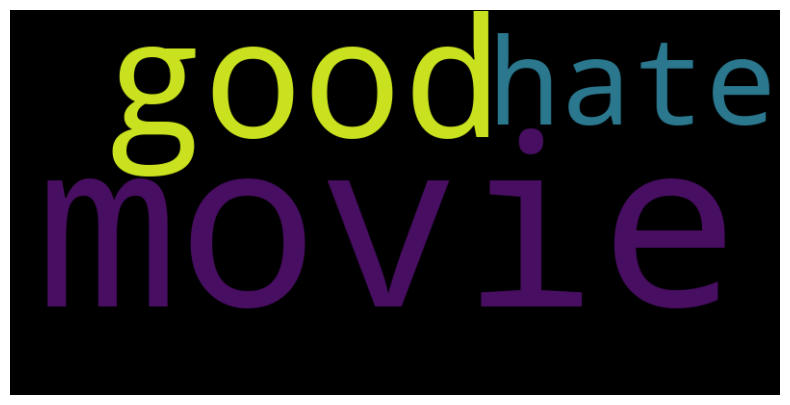

In [49]:
text="this movie is not good and i hate it"

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
s_text=text.split(' ')


for i in range(len(s_text)):
    s_text[i]=word_index[s_text[i]]

    
    
s_text2=np.array([s_text])
s_text3 = pad_sequences(s_text2, maxlen=250)
yp=model.predict(s_text3)
score = yp[0][0]
sentiment = "Positive" if score > 0.4 else "Negative"

print(yp)
print(sentiment)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()